# Fashion Image predictor:
Fashion-MNIST is a dataset that is commonly used as a benchmark in machine learning for image classification tasks. It consists of 70,000 grayscale images of clothing items from 10 different categories, with 7,000 images per category. Each image is a 28x28 pixel square, making it a relatively small and manageable dataset.

In a deep learning context, the Fashion-MNIST dataset can be used to train a convolutional neural network (CNN) to classify these images into their respective categories. CNNs are particularly well-suited for image classification tasks because they can automatically learn hierarchical representations of features from the raw pixel values of the images.

The typical approach to using Fashion-MNIST in deep learning involves the following steps:

1. **Data Loading and Preprocessing**: Load the dataset and preprocess the images. This may include normalizing pixel values to a range between 0 and 1, and splitting the dataset into training, validation, and test sets.

2. **Model Architecture**: Design a CNN architecture suitable for the Fashion-MNIST dataset. This typically involves stacking convolutional layers with activation functions (e.g., ReLU), pooling layers (e.g., MaxPooling), and possibly dropout layers for regularization.

3. **Training**: Train the CNN on the training set using an optimization algorithm like stochastic gradient descent (SGD) or Adam. During training, the model learns to minimize a loss function, such as categorical cross-entropy, which measures the difference between predicted and actual labels.

4. **Evaluation**: Evaluate the trained model on the validation set to assess its performance. This is typically done by calculating metrics such as accuracy, precision, recall, and F1 score.

5. **Testing**: Finally, test the model on the test set to obtain a final evaluation of its performance. This provides an estimate of how well the model generalizes to unseen data.

Fashion-MNIST is a useful dataset for practicing deep learning techniques, as it provides a more challenging alternative to the classic MNIST dataset (which consists of handwritten digits). It allows researchers and practitioners to experiment with different CNN architectures, hyperparameters, and optimization strategies to improve their understanding and skills in deep learning for image classification.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
print('Training data: ',train_data[0])
print('Training data: ',train_labels[0])

Training data:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [3]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

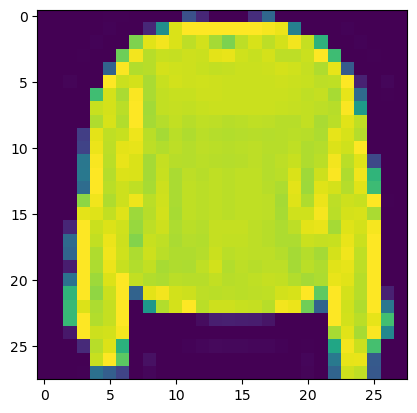

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [5]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

len(class_names)

10

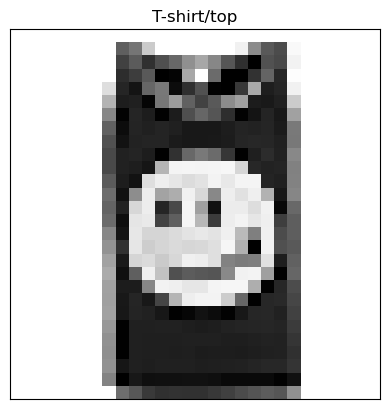

In [6]:
index_of_choice = 101
top = plt.imshow(train_data[index_of_choice], cmap= plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])
top.axes.get_xaxis().set_visible(False)
top.axes.get_yaxis().set_visible(False)

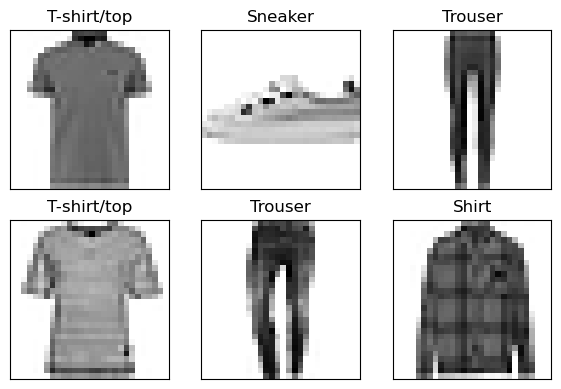

In [7]:
import random
plt.figure(figsize=(7,7))
for i in range(6):
    ax = plt.subplot(3,3, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10


C:\Users\PMYLS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0936 - loss: 2.9855 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - accuracy: 0.0985 - loss: 2.3028

In [9]:
model_11.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [10]:
train_data.min(), train_data.max()

(0, 255)

In [11]:
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / train_data.max()
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [15]:
print("train_data_norm",len(train_data_norm))
print("test_data_norm",len(test_data_norm))

train_data_norm 60000
test_data_norm 10000


In [61]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3786 - loss: 1.5988 - val_accuracy: 0.6478 - val_loss: 0.9755
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 939us/step - accuracy: 0.6882 - loss: 0.8773 - val_accuracy: 0.7556 - val_loss: 0.7508
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 957us/step - accuracy: 0.7669 - loss: 0.7102 - val_accuracy: 0.7734 - val_loss: 0.6813
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.7823 - loss: 0.6495 - val_accuracy: 0.7864 - val_loss: 0.6437
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.7887 - loss: 0.6192 - val_accuracy: 0.7879 - val_loss: 0.6276
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.7927 - loss: 0.6012 - val_accuracy: 0.7889 - val_loss: 0.6173
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.7961 - loss: 0.5894 - val_accuracy: 0.7887 - val_loss: 0.6109
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.7983 - l

<Axes: title={'center': 'Normalized History'}>

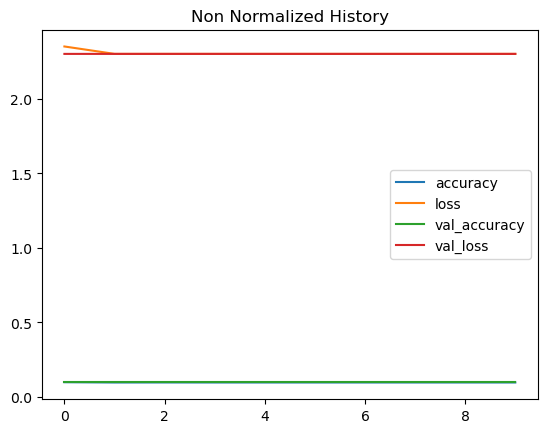

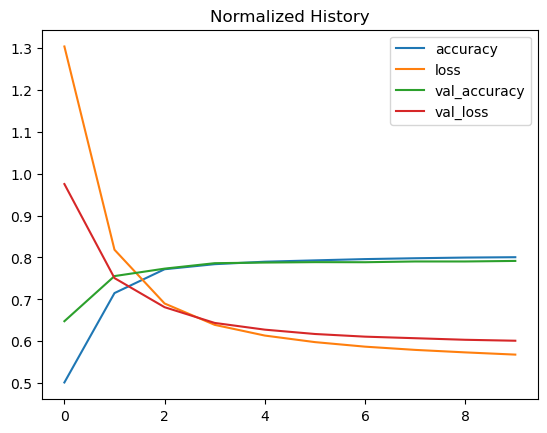

In [62]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title='Non Normalized History')
pd.DataFrame(norm_history.history).plot(title='Normalized History')

In [63]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=["accuracy"])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

norm_history = model_12.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_schedular])

Epoch 1/40


C:\Users\PMYLS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3685 - loss: 1.7045 - val_accuracy: 0.5725 - val_loss: 1.1245 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.6631 - loss: 1.0000 - val_accuracy: 0.7380 - val_loss: 0.7977 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.7458 - loss: 0.7660 - val_accuracy: 0.7532 - val_loss: 0.7261 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.7597 - loss: 0.7041 - val_accuracy: 0.7627 - val_loss: 0.6971 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.7732 - loss: 0.6746 - val_accuracy: 0.7715 - val_loss: 0.6796 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.7844 - loss: 0.6511 - val_accuracy: 0.7833 - val_loss: 0.6564 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - accuracy: 0.7909 - 

Text(0.5, 1.0, 'Finding the ideal learning rate')

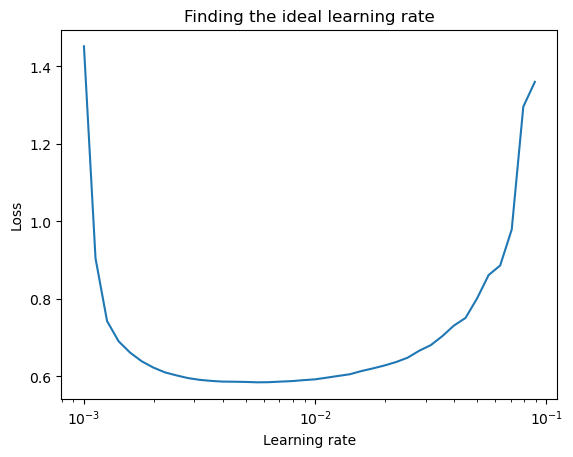

In [64]:
import numpy as np
import matplotlib.pyplot as plt

lr = 1e-3 *(10**(np.arange(40)/20))
plt.semilogx(lr, norm_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title("Finding the ideal learning rate")

In [75]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


history = model_14.fit(train_data, train_labels, epochs=40, validation_data=(test_data, test_labels))

Epoch 1/40


C:\Users\PMYLS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1005 - loss: 2.6427 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 939us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 885us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.0985 - loss: 2.3028

In [66]:
import itertools
from sklearn.metrics import confusion_matrix

def make_onfusion_matrix(y_true, y_pred, classes = None, figsize = (10,10), text_size=15):

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=(15,15))
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arrange(cm.shape[0])

    ax.set(title="Confusion matrix", xlabel='Predicted labels',
          ylabel='True label',
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

    ax.xaxis.tick_bottom()

    threshold = (cm.max() + cm.min())/2

    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [67]:
 y_prob = model_14.predict(test_data)
y_prob[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step


array([[1.7528571e-05, 1.2854739e-05, 3.6729133e-04, 2.5637726e-05,
        6.5960945e-04, 4.1607734e-02, 1.7918863e-04, 2.3553030e-01,
        2.9428061e-03, 7.1865708e-01],
       [6.4863160e-02, 3.1745783e-04, 3.6182153e-01, 3.7654389e-02,
        2.4082175e-01, 2.4546646e-08, 2.9353487e-01, 2.5794083e-07,
        9.8657422e-04, 1.5549645e-24],
       [3.0135994e-09, 9.9986446e-01, 3.4474066e-17, 1.3555594e-04,
        2.2325981e-10, 0.0000000e+00, 6.0450984e-11, 0.0000000e+00,
        6.7005672e-09, 0.0000000e+00],
       [4.8537703e-09, 9.9983096e-01, 9.5778621e-17, 1.6902883e-04,
        4.2596610e-10, 0.0000000e+00, 1.1443924e-10, 0.0000000e+00,
        1.2639575e-08, 0.0000000e+00],
       [1.4813247e-01, 2.0912305e-05, 3.2383120e-01, 4.4710726e-02,
        1.0675792e-01, 6.5148235e-15, 3.7654361e-01, 1.0606888e-13,
        3.0987026e-06, 0.0000000e+00]], dtype=float32)

In [68]:
y_prob[0].argmax(), class_names[y_prob[0].argmax()]

(9, 'Ankle boot')

In [69]:
y_pred = y_prob.argmax(axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7], dtype=int64)

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_pred)

array([[690,   4,  42, 106,  51,   0,  80,   9,  18,   0],
       [  2, 940,   5,  31,  15,   0,   5,   0,   2,   0],
       [ 16,   0, 599,  11, 335,   0,  23,   9,   7,   0],
       [ 21,  50,  27, 784,  62,   0,  49,   5,   2,   0],
       [  2,   0, 404,  41, 499,   0,  34,  10,  10,   0],
       [  0,   0,   2,   0,   4, 824,   0,  68,  18,  84],
       [137,   1, 330,  62, 313,   0, 106,  21,  30,   0],
       [  0,   0,   0,   0,   1,  39,   0, 625,   4, 331],
       [  0,   2,  12,   4,  83,   5,   0,  26, 867,   1],
       [  0,   0,   1,   0,   0,  18,   0,  13,   0, 968]], dtype=int64)

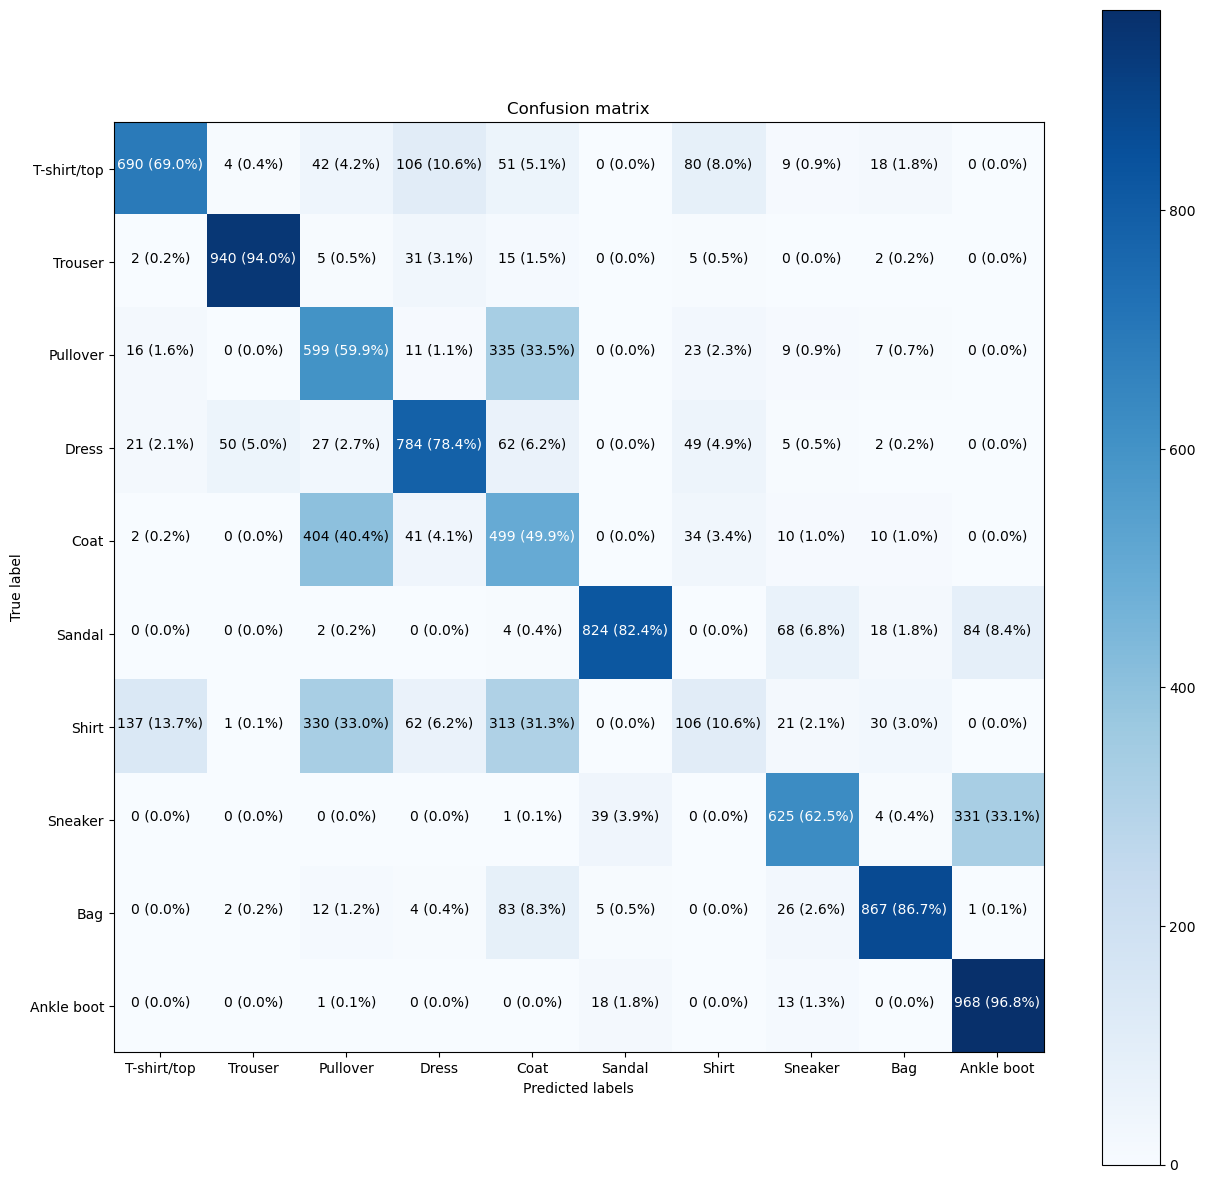

In [71]:
make_onfusion_matrix(y_true=test_labels, y_pred=y_pred, classes= class_names, figsize=(8,8), text_size=10)

In [72]:
 import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


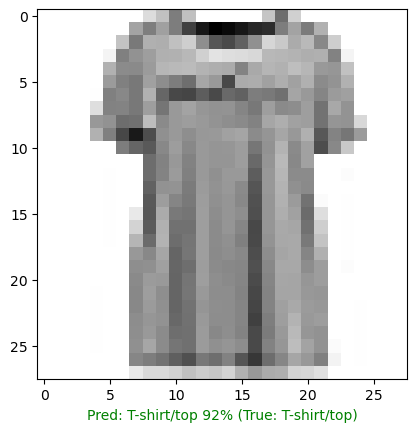

In [73]:
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)